In [1]:
# import mpld3
# mpld3.enable_notebook()
%matplotlib notebook
# %matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt
print(cv2.__version__)

4.2.0-dev


In [2]:
def rotate_image(img, degrees):
    (h,w) = img.shape[:2]
    center = (w/2, h/2)
    M = cv2.getRotationMatrix2D(center, degrees, 1.0)
    return cv2.warpAffine(img, M, (h,w))

In [3]:
cap = cv2.VideoCapture(0)

In [4]:
ret,frame = cap.read()

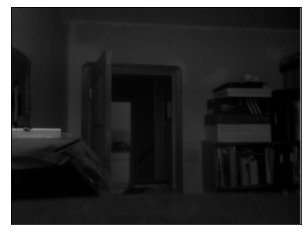

In [5]:
%matplotlib inline
img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [6]:
ret,frame = cap.read()
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

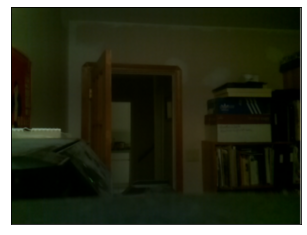

In [7]:
plt.imshow(img, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [8]:
ret,frame = cap.read()
img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max() * hist.max()

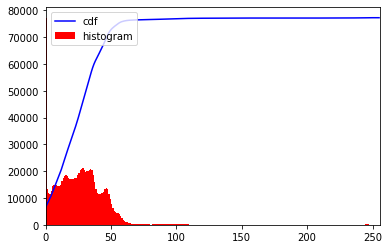

In [9]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [10]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [11]:
img2 = cdf[img]

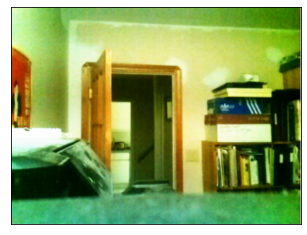

In [12]:
plt.imshow(img2, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [13]:
cap.release()